# PCA (principle componant Analysis)

Principal Component Analysis is an unsupervised learning algorithm that is used 
for the dimensionality reduction in machine learning.
PCA generally tries to find the lower-dimensional surface to project the high-dimensional data.

Some real-world applications of PCA are image processing, movie recommendation system, 
optimizing the power allocation in various communication channels. It is a feature extraction technique,
so it contains the important variables and drops the least important variable.

# The PCA algorithm is based on some mathematical concepts such as:


1. Variance and Covariance
2. Eigenvalues and Eigen factors

# Steps for PCA algorithm
1. Getting the dataset:- 
Firstly, we need to take the input dataset and divide it into two subparts X and Y, where X is the training set, and Y is the validation set.

2. Representing data into a structure:- 
Now we will represent our dataset into a structure. Such as we will represent the two-dimensional matrix of independent variable X. Here each row corresponds to the data items, and the column corresponds to the Features. The number of columns is the dimensions of the dataset.
3. Standardizing the data:- 
In this step, we will standardize our dataset. Such as in a particular column, the features with high variance are more important compared to the features with lower variance.
If the importance of features is independent of the variance of the feature, then we will divide each data item in a column with the standard deviation of the column. Here we will name the matrix as Z.
4. Calculating the Covariance of Z:-
To calculate the covariance of Z, we will take the matrix Z, and will transpose it. After transpose, we will multiply it by Z. The output matrix will be the Covariance matrix of Z.
5. Calculating the Eigen Values and Eigen Vectors:-
Now we need to calculate the eigenvalues and eigenvectors for the resultant covariance matrix Z. Eigenvectors or the covariance matrix are the directions of the axes with high information. And the coefficients of these eigenvectors are defined as the eigenvalues.
6. Sorting the Eigen Vectors:-
In this step, we will take all the eigenvalues and will sort them in decreasing order, which means from largest to smallest. And simultaneously sort the eigenvectors accordingly in matrix P of eigenvalues. The resultant matrix will be named as P*.
7. Calculating the new features Or Principal Components:-
Here we will calculate the new features. To do this, we will multiply the P* matrix to the Z. In the resultant matrix Z*, each observation is the linear combination of original features. Each column of the Z* matrix is independent of each other.
8. Remove less or unimportant features from the new dataset:-
The new feature set has occurred, so we will decide here what to keep and what to remove. It means, we will only keep the relevant or important features in the new dataset, and unimportant features will be removed out.

# PCA
If We have thousand of features and we have to identify that which one is important 
so we use PCA.
PCA is a process to figuring out most importtant features which impact more to the target variables.


Before Using PCA we should scale features


# Coding

In [2]:
import pandas as pd
from sklearn.datasets import load_digits

In [3]:
dataset= load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [8]:
dataset.data.shape

(1797, 64)

In [10]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [12]:
dataset.data[0].reshape(8,8)# if we want to visualize using matplotlib than we have to convert into 2 dimentional array

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 432x288 with 0 Axes>

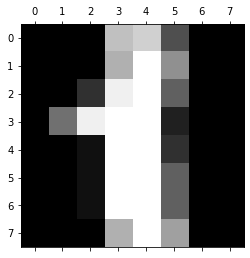

In [19]:
plt.gray()
plt.matshow(dataset.data[1].reshape(8,8))

In [21]:
import numpy as np
np.unique(dataset.target)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
dataset.target[8]

8

In [26]:
df= pd.DataFrame(dataset.data,columns=dataset.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [27]:
x=df
y=dataset.target

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scal=sc.fit_transform(x)
x_scal

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_scal,y, test_size=0.3,random_state=0)
x_train.shape

(1257, 64)

In [50]:
y_train.shape

(1257,)

In [51]:
x_test.shape

(540, 64)

In [52]:
y_test.shape

(540,)

In [58]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9574074074074074

In [63]:
from sklearn.decomposition import PCA
pca=PCA(0.95)# it will tell that retain 95% of useful features and create new dimentions
pca_d=pca.fit_transform(x)
pca_d.shape

(1797, 29)

In [64]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

1st columns capturing 14% useful data, 2nd coluns capturing 13% useful information and so on

In [70]:
x_train, x_test, y_train, y_test= train_test_split(pca_d,y, test_size=0.3,random_state=0)
x_train.shape

(1257, 29)

In [72]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9462962962962963

In [79]:
pca=PCA(n_components=2)
x_pca= pca.fit_transform(x)
x_pca.shape

(1797, 2)

In [83]:
x_train, x_test, y_train, y_test= train_test_split(x_pca,y, test_size=0.3,random_state=0)
x_train.shape
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.5814814814814815

In [ ]:
# Not enough features to achive accuracy